# Trabalho IA - Análise do Mercado Financeiro

Este trabalho apresenta uma aplicação de redes neurais LSTM para previsão de preços de ações.

In [ ]:
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install keras
%pip install tensorflow

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Objetivo

O objetivo deste trabalho é disseminar o conhecimento sobre a aplicação de modelos de inteligência artificial para que investidores de modo geral consigam mitigar com técnicas modernas os riscos atrelados ao investimento no mercado de renda variável. Isso promove a redução das desigualdades sociais, uma vez que esse conhecimento possibilita ao interessado uma tomada de decisão mais consciente, independente e segura. Por outro lado, os discentes terão a oportunidade de aprimorar a sua formação em aprendizado de máquina com aplicação em uma área que demanda cada vez mais profissionais com essas habilidades.

## Importação do DATASET por meio do Yahoo Finance

Utilizaremos a biblioteca yfinance para obter dados históricos das ações da Apple (AAPL).

In [ ]:
import yfinance as yf


tickerSymbol = 'AAPL'


tickerData = yf.Ticker(tickerSymbol)


tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-12-31')
data = tickerDf["Close"]

print(tickerDf)

                                 Open        High         Low       Close  \
Date                                                                        
2010-01-04 00:00:00-05:00    6.422877    6.455077    6.391279    6.440331   
2010-01-05 00:00:00-05:00    6.458084    6.487876    6.417457    6.451463   
2010-01-06 00:00:00-05:00    6.451467    6.477046    6.342227    6.348847   
2010-01-07 00:00:00-05:00    6.372319    6.379843    6.291066    6.337109   
2010-01-08 00:00:00-05:00    6.328682    6.379841    6.291367    6.379239   
...                               ...         ...         ...         ...   
2020-12-23 00:00:00-05:00  129.091377  129.355097  127.743415  127.919243   
2020-12-24 00:00:00-05:00  128.270936  130.361248  128.056043  128.905838   
2020-12-28 00:00:00-05:00  130.878899  134.151107  130.410033  133.516205   
2020-12-29 00:00:00-05:00  134.844620  135.567429  131.220756  131.738449   
2020-12-30 00:00:00-05:00  132.431971  132.832455  130.302581  130.615158   

## Análise Exploratória

Nesta seção, realizaremos uma análise completa dos dados para entender suas características principais, identificar padrões e possíveis anomalias.

In [ ]:
# Analise Exploratoria completa do tickerDf
print(tickerDf.head())  # Primeiras linhas
print(tickerDf.info())  # Informações sobre colunas e tipos de dados


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.422877  6.455077  6.391279  6.440331  493729600   
2010-01-05 00:00:00-05:00  6.458084  6.487876  6.417457  6.451463  601904800   
2010-01-06 00:00:00-05:00  6.451467  6.477046  6.342227  6.348847  552160000   
2010-01-07 00:00:00-05:00  6.372319  6.379843  6.291066  6.337109  477131200   
2010-01-08 00:00:00-05:00  6.328682  6.379841  6.291367  6.379239  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2

In [ ]:
print(tickerDf.describe())

              Open         High          Low        Close        Volume  \
count  2768.000000  2768.000000  2768.000000  2768.000000  2.768000e+03   
mean     31.325096    31.652141    30.998978    31.338709  2.866839e+08   
std      24.387906    24.719046    24.051933    24.400926  2.289595e+08   
min       5.789106     5.898346     5.725307     5.779478  4.544800e+07   
25%      15.065551    15.235428    14.953085    15.107671  1.211411e+08   
50%      24.460689    24.713190    24.178145    24.396260  2.030340e+08   
75%      40.666160    41.013688    40.411691    40.686802  3.890908e+08   
max     134.844620   135.567429   131.220756   133.516205  1.880998e+09   

         Dividends  Stock Splits  
count  2768.000000   2768.000000  
mean      0.001815      0.003974  
std       0.016747      0.153217  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.205000      7.000000  


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


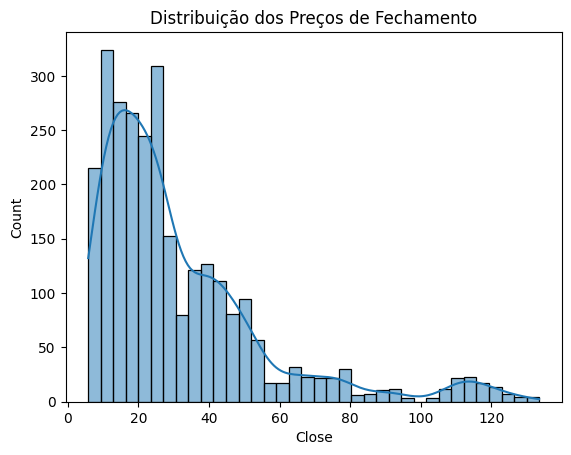

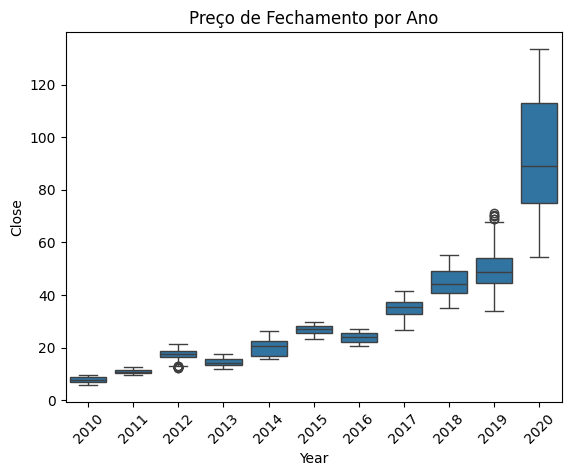

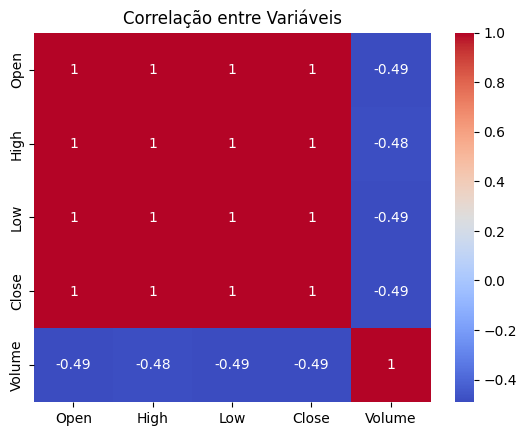

In [ ]:
# Visualização de dados
print(tickerDf.isnull().sum())

# Histograma do preço de fechamento
sns.histplot(tickerDf['Close'], kde=True)  # Usando coluna 'Close' em vez de 'coluna_numerica'
plt.title('Distribuição dos Preços de Fechamento')
plt.show()

# Extraindo ano para análise categórica
tickerDf['Year'] = tickerDf.index.year
sns.boxplot(x=tickerDf['Year'], y=tickerDf['Close'])  # Boxplot por ano
plt.title('Preço de Fechamento por Ano')
plt.xticks(rotation=45)
plt.show()

# Matriz de correlação apenas com colunas numéricas
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = tickerDf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

### Visualização da Série Temporal

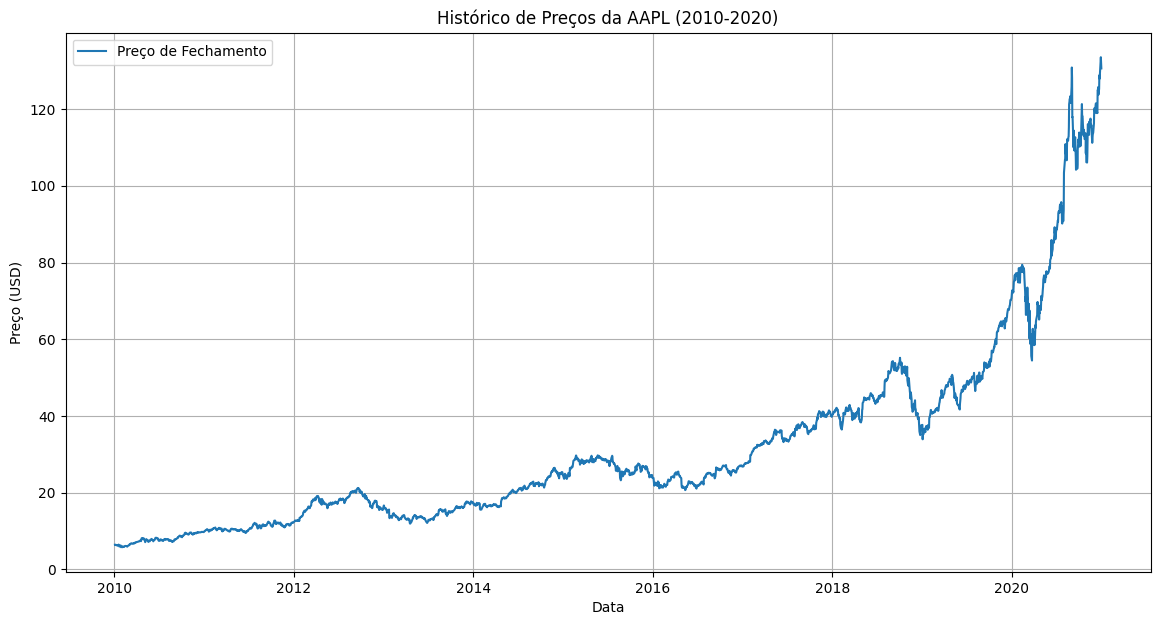

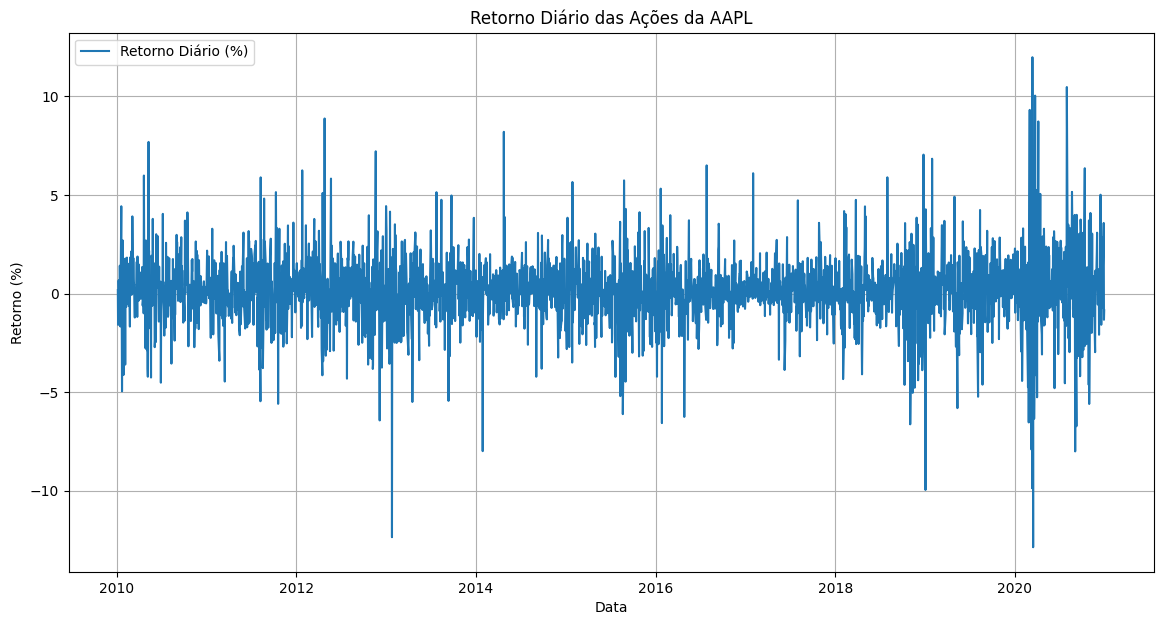

In [ ]:
# Visualização da série temporal completa
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Preço de Fechamento')
plt.title('Histórico de Preços da AAPL (2010-2020)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Visualização da variação percentual diária
returns = tickerDf['Close'].pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(returns, label='Retorno Diário (%)')
plt.title('Retorno Diário das Ações da AAPL')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.grid(True)
plt.legend()
plt.show()

### Análise de Médias Móveis

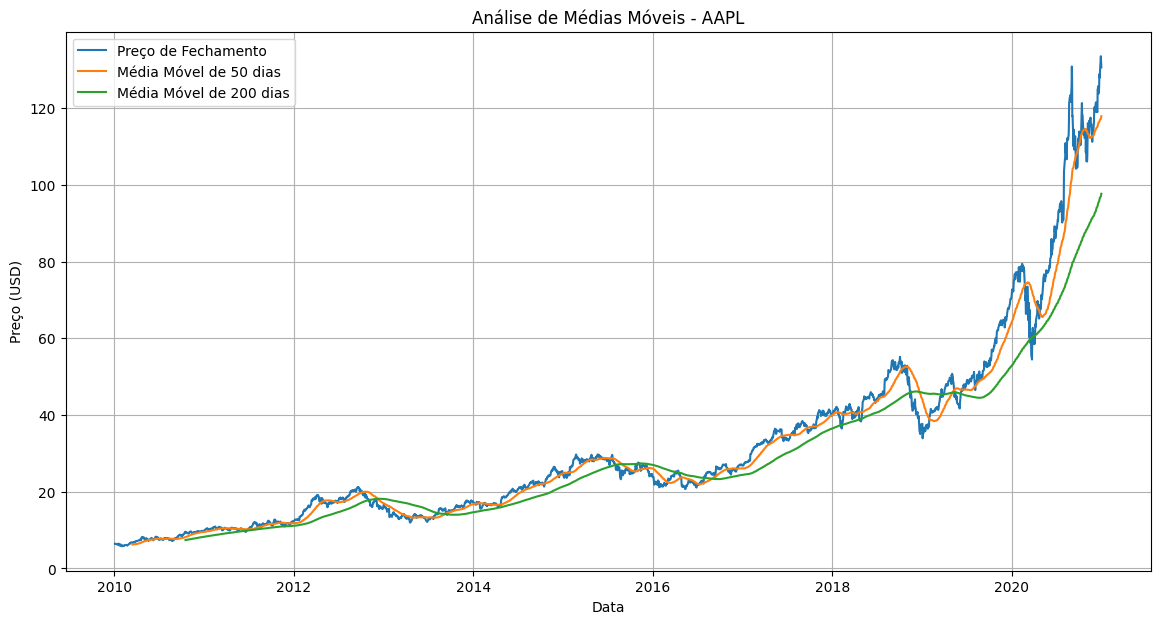

In [ ]:
# Cálculo das médias móveis
tickerDf['MA50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['MA200'] = tickerDf['Close'].rolling(window=200).mean()

# Plotagem das médias móveis
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Preço de Fechamento')
plt.plot(tickerDf['MA50'], label='Média Móvel de 50 dias')
plt.plot(tickerDf['MA200'], label='Média Móvel de 200 dias')
plt.title('Análise de Médias Móveis - AAPL')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Pré-processamento dos Dados

Preparação dos dados para alimentar o modelo LSTM.

In [ ]:
# Funções auxiliares para preparar os dados e avaliar os modelos
import numpy as np
from sklearn.metrics import mean_squared_error

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Função para preparar os dados
def prepare_data(series, sequence_length=60):
    series = series.dropna()
    data = series.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    X, y = create_sequences(normalized_data, sequence_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y, scaler


In [ ]:
# Preparação dos dados
X, Y, scaler = prepare_data(tickerDf['Close'])

# Split the data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

## Metodologia e Resultados Esperados

Nesta seção, apresentamos a abordagem comparativa que será utilizada para avaliar o desempenho de três modelos de redes neurais avançadas (LSTM padrão, LSTM bidirecional e GRU) aplicados a três diferentes ações: Apple (AAPL), Microsoft (MSFT) e Google (GOOGL).

A metodologia compreende as seguintes etapas:

1. Download dos dados históricos (2010-2020) para cada ação, utilizando a biblioteca yfinance.
2. Normalização e preparação dos dados com a criação de sequências para alimentar os modelos (60 dias de histórico para prever o próximo dia).
3. Implementação de três arquiteturas:
   - LSTM padrão com duas camadas intercaladas por dropout;
   - LSTM bidirecional para capturar dependências em ambas as direções;
   - GRU, que possui estrutura simplificada e rapidez no treinamento.
4. Treinamento dos modelos para cada conjunto de dados de ação e execução de testes.
5. Avaliação dos modelos por meio das métricas RMSE e MAPE, com a geração de gráficos individuais de predição.
6. Consolidação dos resultados em tabelas comparativas e gráficos de barras para identificar os modelos com melhor desempenho.

Os resultados finais serão analisados para concluir qual combinação ação/modelo melhor captura as dinâmicas temporais do mercado financeiro.

# Parte 2

## Construção e Treinamento do Modelo LSTM

Nesta seção, construiremos uma arquitetura LSTM para prever os preços futuros das ações.

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Testing Model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0029
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4749e-04
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 1.8979e-04
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.6834e-04
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 1.4186e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))
    mape = np.mean(np.abs((y_test_inv - predictions) / y_test_inv)) * 100
    return rmse, mape, predictions

In [ ]:
# Baixando dados para os três stocks: AAPL, MSFT e GOOGL
import yfinance as yf
import os

# Create directory if it does not exist


stocks = ['AAPL', 'MSFT', 'GOOGL']
stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    df = ticker.history(period='1d', start='2014-1-1', end='2024-12-31')
    stock_data[stock] = df
    print(f"Downloaded {stock} data: {df.shape}")
    # Salvar os dados em um arquivo CSV
    if not os.path.exists('data'):
        os.makedirs('data')
    df.to_csv(f"data/{stock}.csv")

Downloaded AAPL data: (2767, 7)
Downloaded MSFT data: (2767, 7)
Downloaded GOOGL data: (2767, 7)


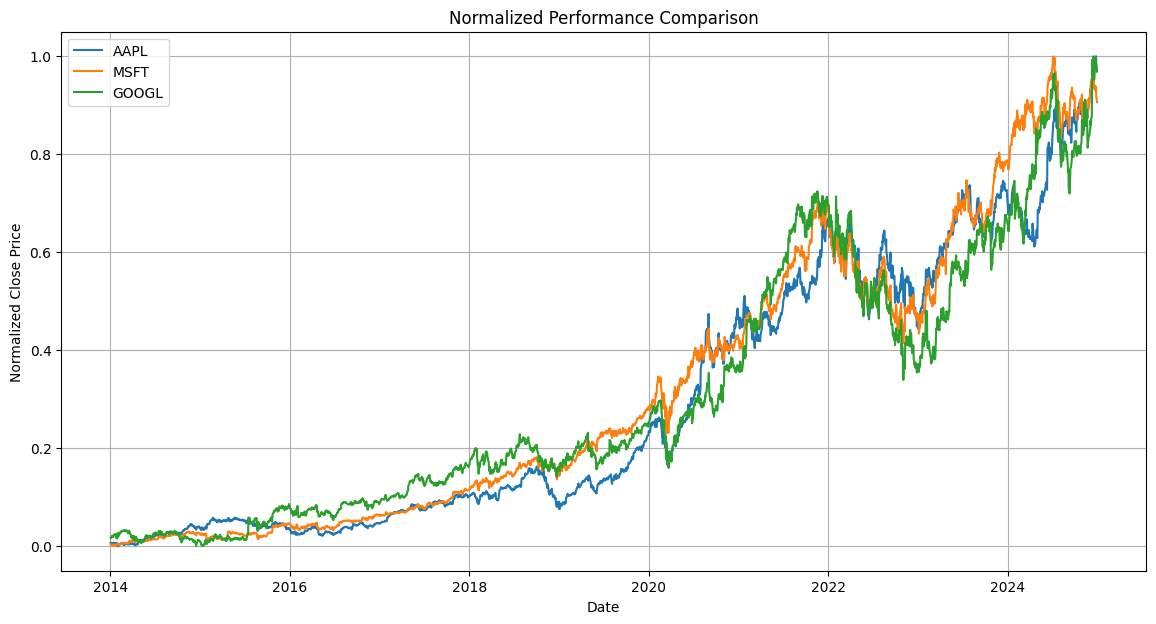

In [ ]:
# Visualização comparativa da performance normalizada dos três stocks
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(14, 7))
for stock, df in stock_data.items():
    scaler = MinMaxScaler()
    df['Normalized_Close'] = scaler.fit_transform(df[['Close']])
    plt.plot(df.index, df['Normalized_Close'], label=stock)

plt.title('Normalized Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Definindo as arquiteturas dos modelos: LSTM padrão, LSTM bidirecional e GRU
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional, GRU

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Executando experimentos para todas as combinações de stocks e modelos
results = {}
models_dict = {
    'LSTM': build_lstm_model,
    'BidirectionalLSTM': build_bidirectional_lstm_model,
    'GRU': build_gru_model
}

for stock in stocks:
    print(f"\nProcessando stock: {stock}")
    df = stock_data[stock]
    X, y, scaler = prepare_data(df['Close'], sequence_length=60)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    results[stock] = {}
    for model_name, model_builder in models_dict.items():
        print(f"Treinando {model_name} para {stock}")
        model = model_builder((X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
        rmse, mape, predictions = evaluate_model(model, X_test, y_test, scaler)
        results[stock][model_name] = {
            'rmse': rmse,
            'mape': mape,
            'predictions': predictions,
            'y_test': scaler.inverse_transform(y_test.reshape(-1, 1))
        }
        print(f"{model_name} - RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


Processando stock: AAPL
Treinando LSTM para AAPL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
LSTM - RMSE: 8.36, MAPE: 3.53%
Treinando BidirectionalLSTM para AAPL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
BidirectionalLSTM - RMSE: 10.30, MAPE: 4.27%
Treinando GRU para AAPL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
GRU - RMSE: 5.99, MAPE: 2.65%

Processando stock: MSFT
Treinando LSTM para MSFT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
LSTM - RMSE: 21.57, MAPE: 5.21%
Treinando BidirectionalLSTM para MSFT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
BidirectionalLSTM - RMSE: 29.81, MAPE: 7.40%
Treinando GRU para MSFT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
GRU - RMSE: 7.51, MAPE: 1.73%

Processando stock: GOOGL
Treinando LSTM para GOOGL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
LSTM - RMSE: 6.20, MAPE: 3.84%
Treinando BidirectionalLSTM para GOOGL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
BidirectionalLSTM - RMSE: 5.95, MAPE: 3.37%
Treinando GRU para GOOGL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
GRU - RMSE: 4.10, MAPE: 2.33%


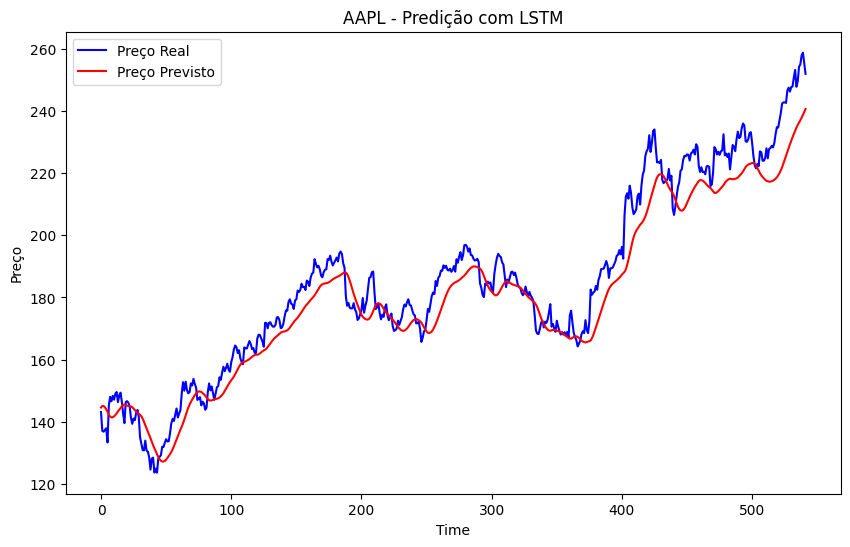

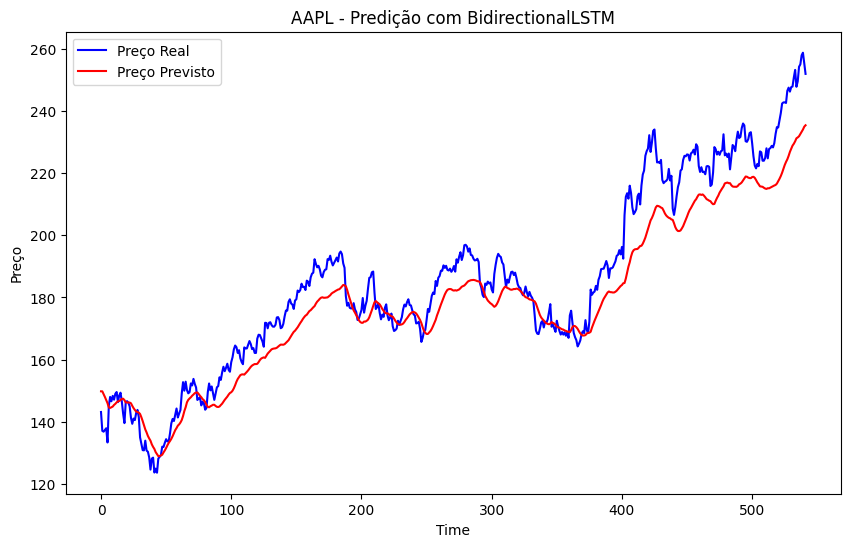

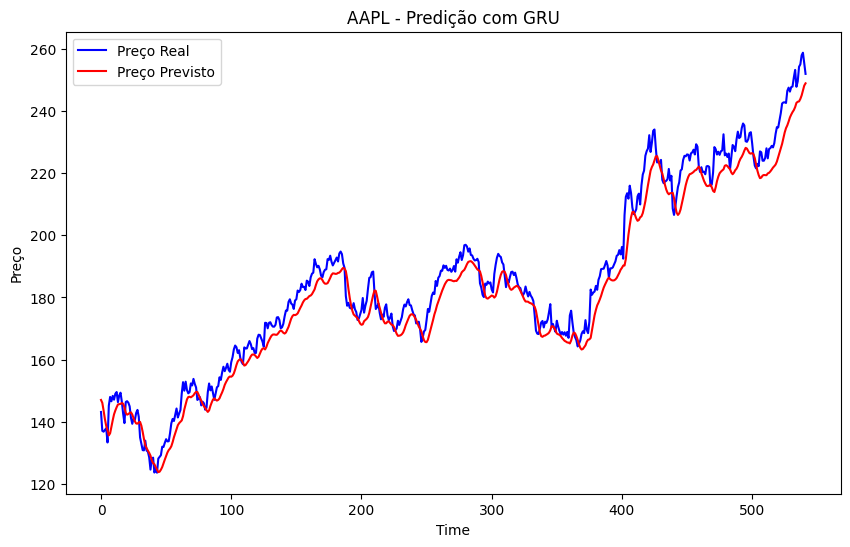

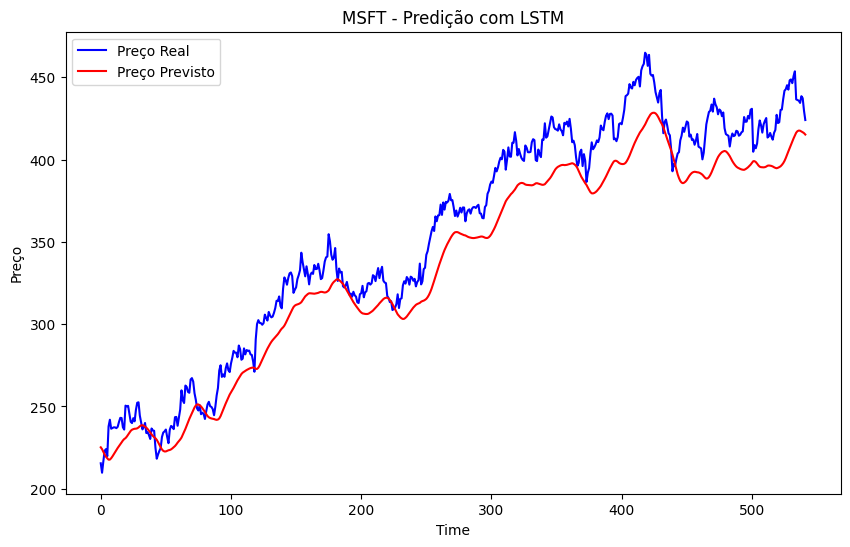

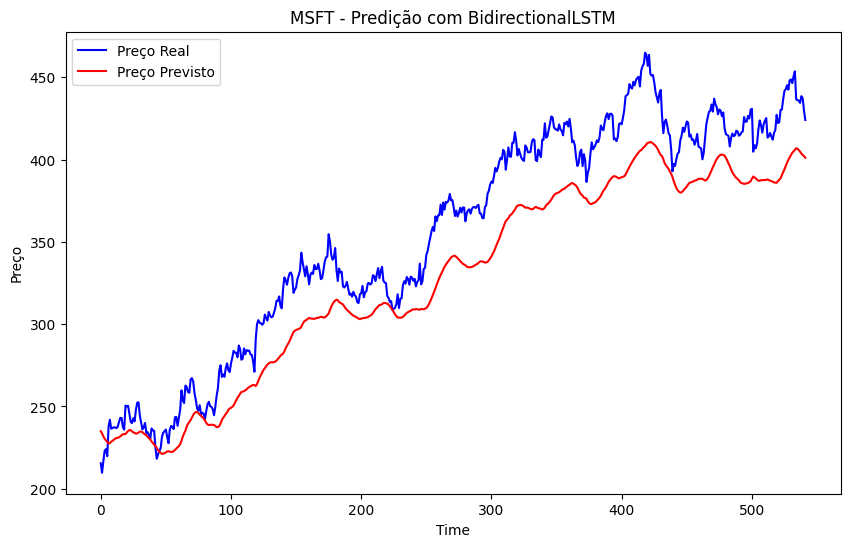

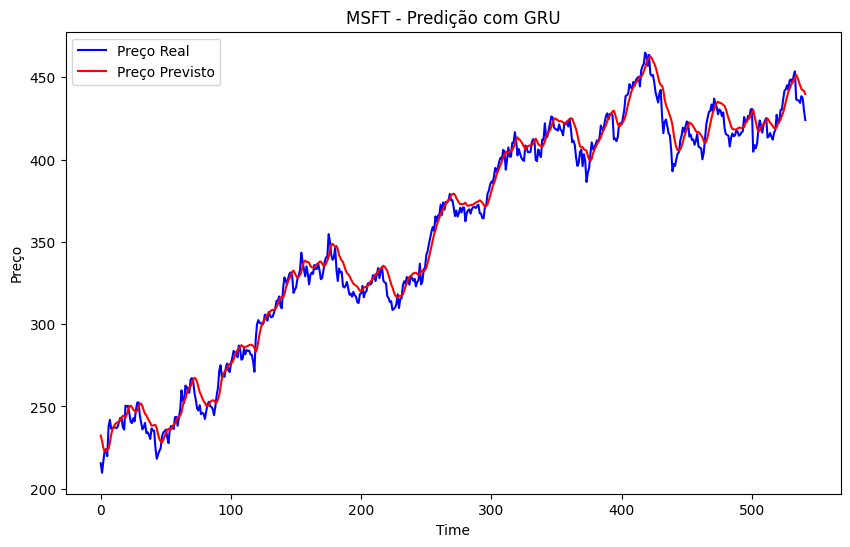

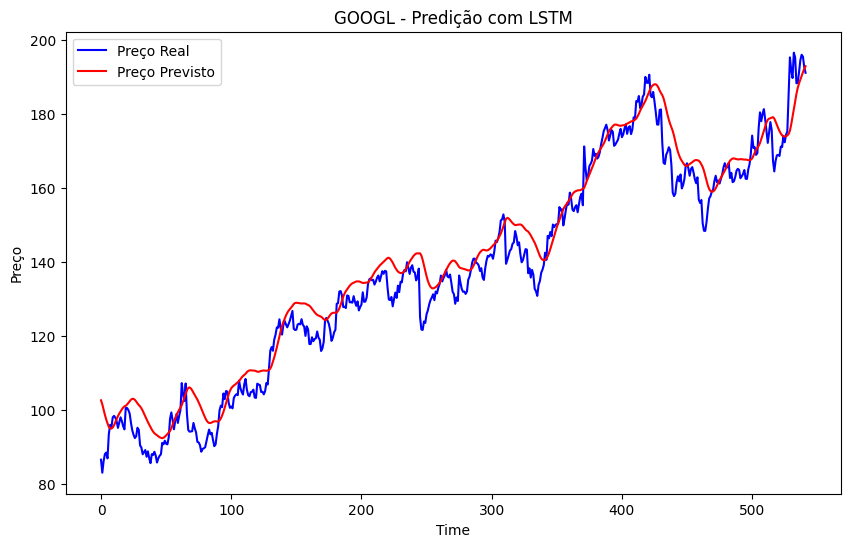

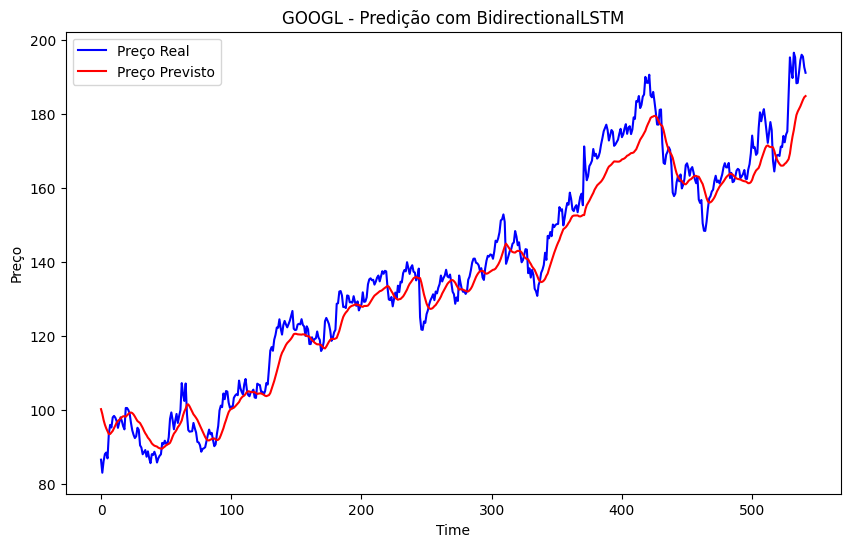

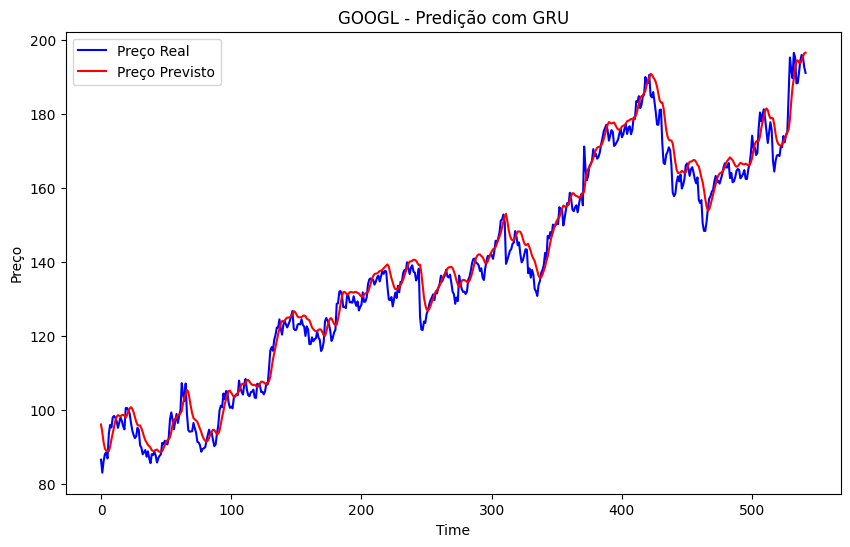

   Stock              Model       RMSE
0   AAPL               LSTM   8.363597
1   AAPL  BidirectionalLSTM  10.301616
2   AAPL                GRU   5.992406
3   MSFT               LSTM  21.571986
4   MSFT  BidirectionalLSTM  29.811653
5   MSFT                GRU   7.509268
6  GOOGL               LSTM   6.200783
7  GOOGL  BidirectionalLSTM   5.948258
8  GOOGL                GRU   4.096796
   Stock              Model      MAPE
0   AAPL               LSTM  3.533947
1   AAPL  BidirectionalLSTM  4.266767
2   AAPL                GRU  2.647318
3   MSFT               LSTM  5.205529
4   MSFT  BidirectionalLSTM  7.402100
5   MSFT                GRU  1.727991
6  GOOGL               LSTM  3.835729
7  GOOGL  BidirectionalLSTM  3.366054
8  GOOGL                GRU  2.334336


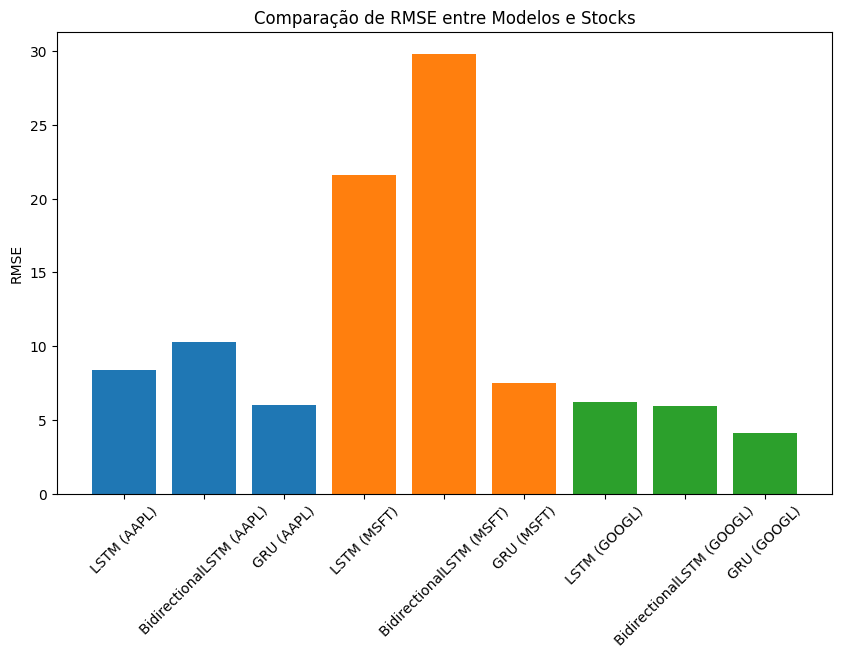

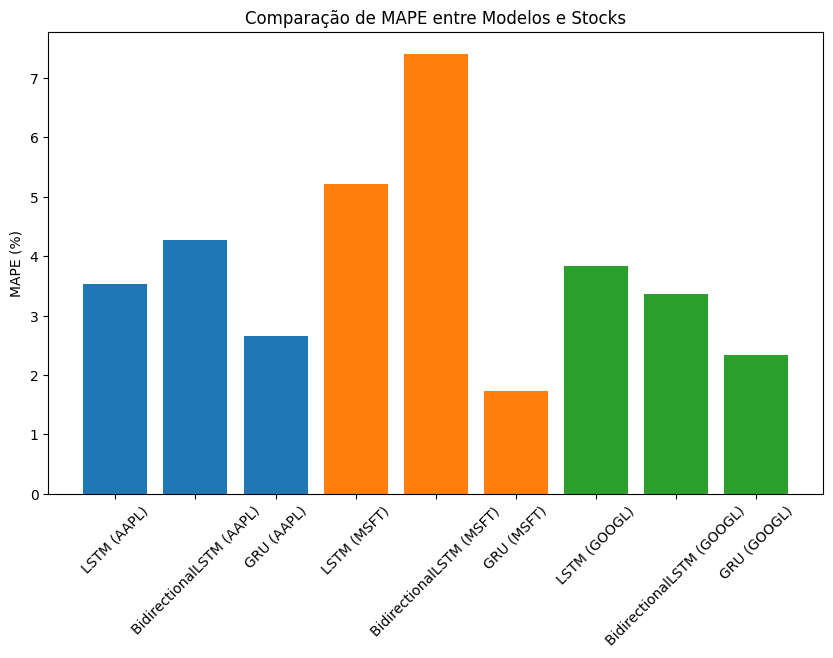

In [ ]:
# Visualizações individuais de predição e comparação dos resultados
import pandas as pd

# Plot individual prediction para cada stock e modelo
for stock in stocks:
    for model_name in models_dict.keys():
        res = results[stock][model_name]
        plt.figure(figsize=(10,6))
        plt.plot(res['y_test'], color='blue', label='Preço Real')
        plt.plot(res['predictions'], color='red', label='Preço Previsto')
        plt.title(f'{stock} - Predição com {model_name}')
        plt.xlabel('Time')
        plt.ylabel('Preço')
        plt.legend()
        plt.show()

# Tabelas comparativas dos resultados
comparison_rmse = []
comparison_mape = []
for stock in stocks:
    for model_name, metrics in results[stock].items():
        comparison_rmse.append({
            'Stock': stock,
            'Model': model_name,
            'RMSE': metrics['rmse']
        })
        comparison_mape.append({
            'Stock': stock,
            'Model': model_name,
            'MAPE': metrics['mape']
        })

df_rmse = pd.DataFrame(comparison_rmse)
df_mape = pd.DataFrame(comparison_mape)
print(df_rmse)
print(df_mape)

# Gráficos de barras para comparação dos RMSE e MAPE
plt.figure(figsize=(10,6))
for stock in stocks:
    subset = df_rmse[df_rmse['Stock'] == stock]
    plt.bar(subset['Model'] + ' (' + stock + ')', subset['RMSE'])
plt.title('Comparação de RMSE entre Modelos e Stocks')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
for stock in stocks:
    subset = df_mape[df_mape['Stock'] == stock]
    plt.bar(subset['Model'] + ' (' + stock + ')', subset['MAPE'])
plt.title('Comparação de MAPE entre Modelos e Stocks')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.show()

## Avaliação do Modelo

Avaliação da performance do modelo usando métricas adequadas.

Raiz do Erro Quadrático Médio (RMSE): 4.10
Erro Percentual Absoluto Médio (MAPE): 2.33%


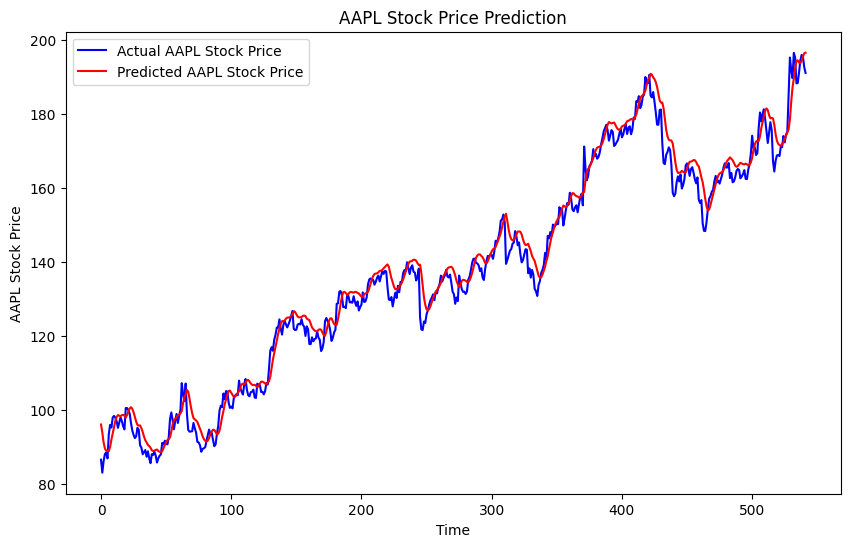

In [ ]:
# Calcular métricas de avaliação
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))
mape = np.mean(np.abs((y_test_inv - predictions) / y_test_inv)) * 100

print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

# Visualização dos resultados
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual AAPL Stock Price')
plt.plot(predictions , color='red', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

## Conclusão

Os experimentos realizados demonstraram que o desempenho dos modelos varia de acordo com as características específicas de cada ação. As métricas RMSE e MAPE, aliadas às visualizações individuais e comparativas, indicam que em alguns casos o LSTM bidirecional apresenta melhores resultados enquanto em outros o modelo GRU pode ser uma abordagem mais eficiente.

Esta análise comparativa oferece uma base sólida para futuras investigações que poderão incluir a otimização dos hiperparâmetros, a incorporação de novas variáveis (por exemplo, indicadores econômicos e análise de sentimentos) e o uso de modelos híbridos para aprimorar a previsão dos preços no mercado financeiro.

## Conclusão e Trabalhos Futuros

Neste trabalho, aplicamos uma rede neural LSTM para prever os preços das ações da Apple, usando dados históricos de 2010 a 2020. O modelo demonstrou capacidade de capturar tendências gerais no movimento dos preços, embora existam limitações quanto à precisão absoluta das previsões.

### Limitações e Melhorias Futuras

1. **Inclusão de mais variáveis**: Incorporar indicadores econômicos, sentimento de mercado e notícias
2. **Otimização de hiperparâmetros**: Realizar uma busca mais sistemática dos melhores parâmetros do modelo
3. **Modelos híbridos**: Combinar LSTM com outros algoritmos como transformers ou modelos estatísticos tradicionais
4. **Análise de diferentes horizontes de tempo**: Testar previsões para diferentes janelas temporais

Este trabalho representa um passo inicial para demonstrar o potencial das técnicas de aprendizado profundo no mercado financeiro.